<a href="https://colab.research.google.com/github/Haender-Michael/Haender_practice/blob/main/Copie_de_Copie_de_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk Assessment: Analysis for best Aicraft Acquisition.

##Introduction
For this analysis, we will use the dataset  **"Aviation Accident Database & Synopses, up to 2023"** from Kaggle, provided by the National Transportation Safety Board (NTSB). This dataset contains comprehensive information about aviation accidents, including aircraft makes and models, weather conditions,Injury severity,accident locations and more.

Our goal is to analyze accident patterns, aircraft reliability, evolution of accident frequency in aviation incidents. We will generate data-driven insights that will help the new aviation division in identifying the safest aircrafts for purchase and determining the best strategies for fleet management.




##Dataset overview
- Aircraft Makes and Models: Information about the specific make and model of the aircraft involved in each incident.

- Weather Conditions: Details on the weather conditions prevailing at the time of the accidents.
- Event date : the specific date each incident happened.
- location : The location where the aviation accident took place.
- injury severity: the Gravity and the amount of injuries.

the dataset also contains other information, that are less relevant to the analysis.


#### N.B: the dataset is not up to date. Any analysis conducted will only be representative of the approximate year range from 1982 to 2023.

## Exploratory Data Analysis (EDA)
For the purpose of this analysis we will take the following steps:
- Data cleaning
- Data Understanding
- Data Analysis
- Data Recommendations
- Summary

Some questions in this analysis will remain unanswered either due to insufficient data within the dataset or because addressing them requires more advanced analysis. These deeper investigations can be conducted upon further consultation with the analyst overseeing this project.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [57]:
df = pd.read_csv('./AviationData.csv', encoding='latin1', low_memory=False)


###Data cleaning.
In this part we will:
- Create a copy of the DataFrame.
- drop columns.
- modify data type in entries and set Index.
- more on missing values.

these steps will ensure that everything run smoothly later during our Analysis.
Some other data clearing process will also be done later.

#### Create a copy of the DataFrame.

In [58]:
# First let's get a quick view of the DataFrame.
df.sample(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
39726,20001208X06060,Incident,MIA96IA146,1996-06-02,"MIAMI, FL",United States,NaN,NaN,MIA,MIAMI INTERNATIONAL,...,Unknown,"Gulfstream Int'l Airlines, Inc",0.0,0.0,0.0,35.0,VMC,Takeoff,Probable Cause,29-08-1997
39582,20001208X05720,Accident,CHI96LA158,1996-05-11,"SPRINGFIELD, MO",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-12-1996
3968,20001214X42140,Accident,ATL83LA118,1983-02-23,"AHOSKIE, NC",United States,NaN,NaN,NaN,NaN,...,Executive/corporate,NaN,0.0,0.0,0.0,2.0,UNK,Cruise,Probable Cause,NaN
51320,20010823X01758,Accident,DEN01LA149,2001-08-18,"ROCK SPRINGS, WY",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,4.0,VMC,Cruise,Probable Cause,25-07-2002
406,20020917X02021,Accident,FTW82DA070,1982-02-24,"HENNESSEY, OK",United States,NaN,NaN,OK42,HAYMAKER,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Landing,Probable Cause,24-02-1983


In [59]:
# let's get some insights about how the data is structured .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [60]:
# Create a copy to preserve the original DataFrame.
df2 = df.copy()
# from now on we will be working with the copy "df2".

In [61]:
# removing unnecessary space in column names for easier access:
df2.columns = df2.columns.str.strip()


In [62]:
# replace "."by "_" in column names for better readability and accessibility.
df2.columns = df2.columns.str.replace('.','_')

#### Drop columns :
Below we will drop columns that are not
needed for the analysis or that doesn't contain a substantial amount of non-null values.





In [63]:
# Event_Id will later be set as Index, so Accident_Number and Registration_Number are unnecessary.
# Injury_Severity only summarizes the three injury level columns,it is not required.
# Publication_Date is not needed for this analysis.

df2 = df2.drop(columns =['Registration_Number','Accident_Number','Publication_Date','Injury_Severity'])

In [64]:
# let's take a look at how much missing values each column contains:
missing_values_count = df2.isna().sum()
missing_values_count

,0
Event_Id,0
Investigation_Type,0
Event_Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport_Code,38757
Airport_Name,36185
Aircraft_damage,3194


In [65]:
# Keep only columns with acceptable missing values.
df2 = df2.loc[:, missing_values_count <= 50000]

#### Modify data type in entries and set index.
- set index.
- reformat column type.

In [66]:
# Make each row in the Event_Id unique and Set index as Event_Id.
df2 = df2.drop_duplicates(subset = ['Event_Id'])
df2.set_index('Event_Id',inplace=True)

In [67]:
# Reformating rows in Event_date to date format:
df2['Event_Date'] = pd.to_datetime(df2['Event_Date'])

In [68]:
# Let's convert the 5 columns :
# Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries, Total_Uninjured ,Number_of_Engines
# into intengers
df2[['Total_Fatal_Injuries','Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']] = (
    df2[['Total_Fatal_Injuries', 'Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']]
    .fillna(0)
    .astype(int)
)

#### More on missing values:
In this section we will fill rows that have missing information and also convert the data in each row to lowercase.

Dropping rows with missing values won't be necessary in the context of this Analysis; since the columns  with missing values we will deal with,later in the Analysis, only contain categorical data.

In [69]:
# Since we have some columns with categorical data that have missing rows
# we can just replace the Null with "UNKNOWN".
categorical_data = []

for column in df2.columns:
    if df2[column].dtype == 'object':
        categorical_data.append(column)

print(categorical_data)


['Investigation_Type', 'Location', 'Country', 'Airport_Code', 'Airport_Name', 'Aircraft_damage', 'Make', 'Model', 'Amateur_Built', 'Engine_Type', 'Purpose_of_flight', 'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status']


In [70]:
# now let's replace all of the Null value with 'UNKNOWN':
df2[categorical_data] = df2[categorical_data].applymap(
    lambda x: 'unknown' if pd.isna(x) else x
)
df2.sample(5)


<ipython-input-70-3e1abb64d4eb>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2[categorical_data] = df2[categorical_data].applymap(


,Investigation_Type,Event_Date,Location,Country,Airport_Code,Airport_Name,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
Event_Id,,,,,,,,,,,,,,,,,,,,
20001213X31129,Accident,1987-06-04,"REDGRANITE, WI",United States,unknown,unknown,Destroyed,Zank,CHALLENGER II,Yes,1,Reciprocating,Personal,1,0,0,0,VMC,Approach,Probable Cause
20070927X01454,Accident,2007-09-02,"DAYTONA BEACH, FL",United States,7FL6,Spruce Creek Airport,Substantial,unknown,Unknown,unknown,0,unknown,Personal,0,0,0,2,VMC,Takeoff,Probable Cause
20001213X28958,Accident,1989-07-02,"ONEIDA, NY",United States,UCA,ONEIDA CO.,Substantial,Cessna,152,No,1,Reciprocating,Personal,0,0,0,1,VMC,Landing,Probable Cause
20001213X34638,Accident,1986-08-09,"ELKO, NV",United States,EKO,ELKO MUNI,Substantial,Piper,PA-38,No,1,Reciprocating,Personal,0,0,0,2,VMC,Takeoff,Probable Cause
20080630X00944,Accident,2008-06-17,"Pahala, HI",United States,unknown,unknown,Substantial,CESSNA,172M,No,1,Reciprocating,unknown,3,0,0,0,VMC,unknown,The pilot's continued visual flight into instr...


In [71]:
# Convert all entries to lowercase so that the same values does not appear many times writen in capital.
df2[categorical_data] = df2[categorical_data].apply(lambda x: x.str.lower())


In [72]:
# Verify if everithing have been adjusted.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87951 entries, 20001218X45444 to 20221230106513
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      87951 non-null  object        
 1   Event_Date              87951 non-null  datetime64[ns]
 2   Location                87951 non-null  object        
 3   Country                 87951 non-null  object        
 4   Airport_Code            87951 non-null  object        
 5   Airport_Name            87951 non-null  object        
 6   Aircraft_damage         87951 non-null  object        
 7   Make                    87951 non-null  object        
 8   Model                   87951 non-null  object        
 9   Amateur_Built           87951 non-null  object        
 10  Number_of_Engines       87951 non-null  int64         
 11  Engine_Type             87951 non-null  object        
 12  Purpose_of_flight       87951

## Data Understanding:
This section ensures that the data is properly structured and prepared for analysis, laying a solid foundation for meaningful insights. It sets the framework for the upcoming exploration.


Below are key questions that the new aviation division may seek to answer. They will be addressed in the notebook.
- Which aircraft makes have suffered the fewest and the most accidents?
- How has accident frequency evolved over the years for certain countries?
- For which flight purpose have accidents been most frequent?
- How resistant are certain aircraft Make to accidents for certain Aircraft models?
- How well are passengers protected in the event of an aircraft crash?

N.B: All of the above questions cannot be answered with this DataFrame but each will be addressed.
An explanation to the reason why some can't be answered will be provided.
If necessary an Analysis will also be provided just after the plot.

In [73]:
# let's get some insights about how the data is structured after cleaning.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87951 entries, 20001218X45444 to 20221230106513
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      87951 non-null  object        
 1   Event_Date              87951 non-null  datetime64[ns]
 2   Location                87951 non-null  object        
 3   Country                 87951 non-null  object        
 4   Airport_Code            87951 non-null  object        
 5   Airport_Name            87951 non-null  object        
 6   Aircraft_damage         87951 non-null  object        
 7   Make                    87951 non-null  object        
 8   Model                   87951 non-null  object        
 9   Amateur_Built           87951 non-null  object        
 10  Number_of_Engines       87951 non-null  int64         
 11  Engine_Type             87951 non-null  object        
 12  Purpose_of_flight       87951

In [74]:
df2.describe()

,Event_Date,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,87951,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000
mean,1999-10-09 03:15:27.475526272,1.066185,0.552421,0.241248,0.308410,4.747553
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989-02-04 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1998-08-07 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2009-07-30 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000
std,NaN,0.516270,4.957053,1.440332,2.086752,25.763553


Now that we have:
> - An overview of the data after cleaning
> - Detected missing values
> - Reviewed basic statistics
> - Conducted initial visualizations

We are ready to proceed with the analysis.


## Data Analysis
In this part we will address each question and Analyze the data.


### Which aircraft makes have suffered the fewest and the most accidents?
To address this question a bar chart of the top 5 Aircraft Makes that have suffered the most accidents and the 5 that have suffered the fewest will be provided.


In [21]:
df2['Make'].value_counts().sample(15) # to get an overview of the different Aircraft make.

,count
Make,
hefner pitts,1
leatherman karl l,1
co z,1
comp air,2
ward christopher barry,1
purvis/thorpe,1
bearden biplane,1
bach joseph e,1
giorgio anthony j,1


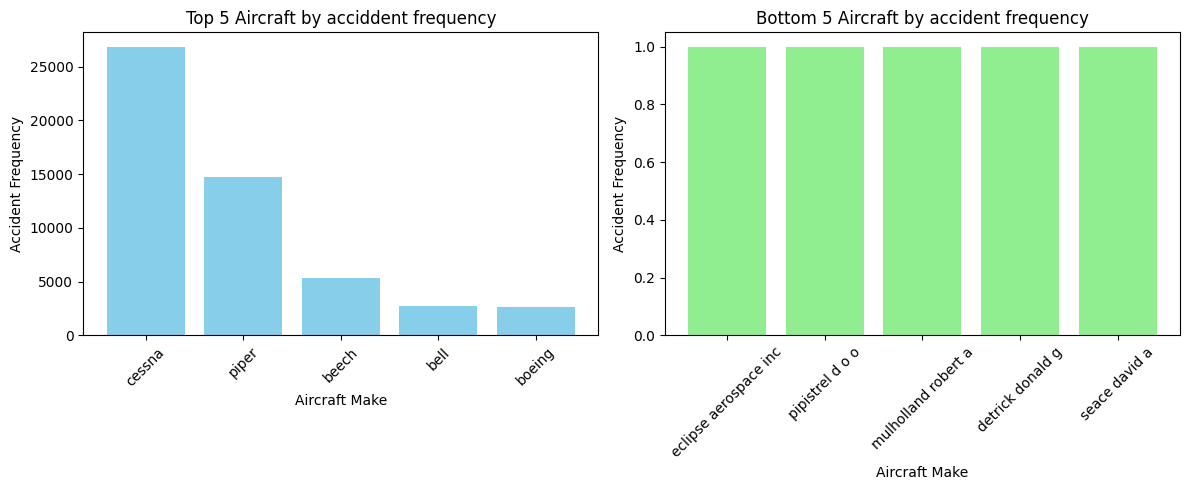

In [88]:
# We will graph in one figure the top 5 most recurrent Aircrafts and the least 5 recurrent for the aviation accident DataFrame.

# Retrieve top and least recurrent aircraft makes.
most_recurrent = df2['Make'].value_counts().head(5)
least_recurrent = df2['Make'].value_counts().tail(5)

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the most recurrent aircraft
axes[0].bar(most_recurrent.index, most_recurrent.values, color='skyblue')
axes[0].set_title('Top 5 Aircraft by acciddent frequency')
axes[0].set_xlabel('Aircraft Make')
axes[0].set_ylabel('Accident Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot the least recurrent aircraft
axes[1].bar(least_recurrent.index, least_recurrent.values, color='lightgreen')
axes[1].set_title('Bottom 5 Aircraft by accident frequency')
axes[1].set_xlabel('Aircraft Make')
axes[1].set_ylabel('Accident Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()



#### Analysis :
Now, we might mistakenly believe that the least recurrent aircraft are the safest, but that's not necessarily true. The fact that these aircraft have fewer recorded accidents could simply mean that they have operated fewer flights, reducing their chances of incidents rather than proving their reliability.

For example, if the aircraft make Cessna has the most accidents, it might simply indicate that it has operated the most flights. However, when analyzing accident rates, it could actually be among the most reliable aircraft in terms of avoiding accidents.

Only by comparing accident rates  instead of frequency can we determine which aircraft make could be considered the most reliable.






### How has accident frequency evolved over the years for certain countries?
The new aviation division would want this information to :
- Evaluate safety trends --> Assess whether accident rates have decreased due to improved regulations and technology.

- Identify high-risk regions --> Determine which countries have consistently high accident frequencies and investigate possible causes.

- Improve fleet management --> Make informed decisions about aircraft acquisition based on reliability across regions.

- Support policy decisions --> Use data-driven insights to enhance aviation safety measures and operational guidelines.



In [23]:
# let's add a column 'Event_Year' to the DataFrame:
df2['Event_Year'] = df2['Event_Date'].apply(lambda x: str(x)[:4])


<ipython-input-23-c82a6687abc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event_Year'] = df2['Event_Date'].apply(lambda x: str(x)[:4])


#### The top 4 countries with the most aviation accidents will be represented in the plot below.

<ipython-input-24-6a3cba8de3ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Event_Year"] = df2["Event_Year"].astype(int)


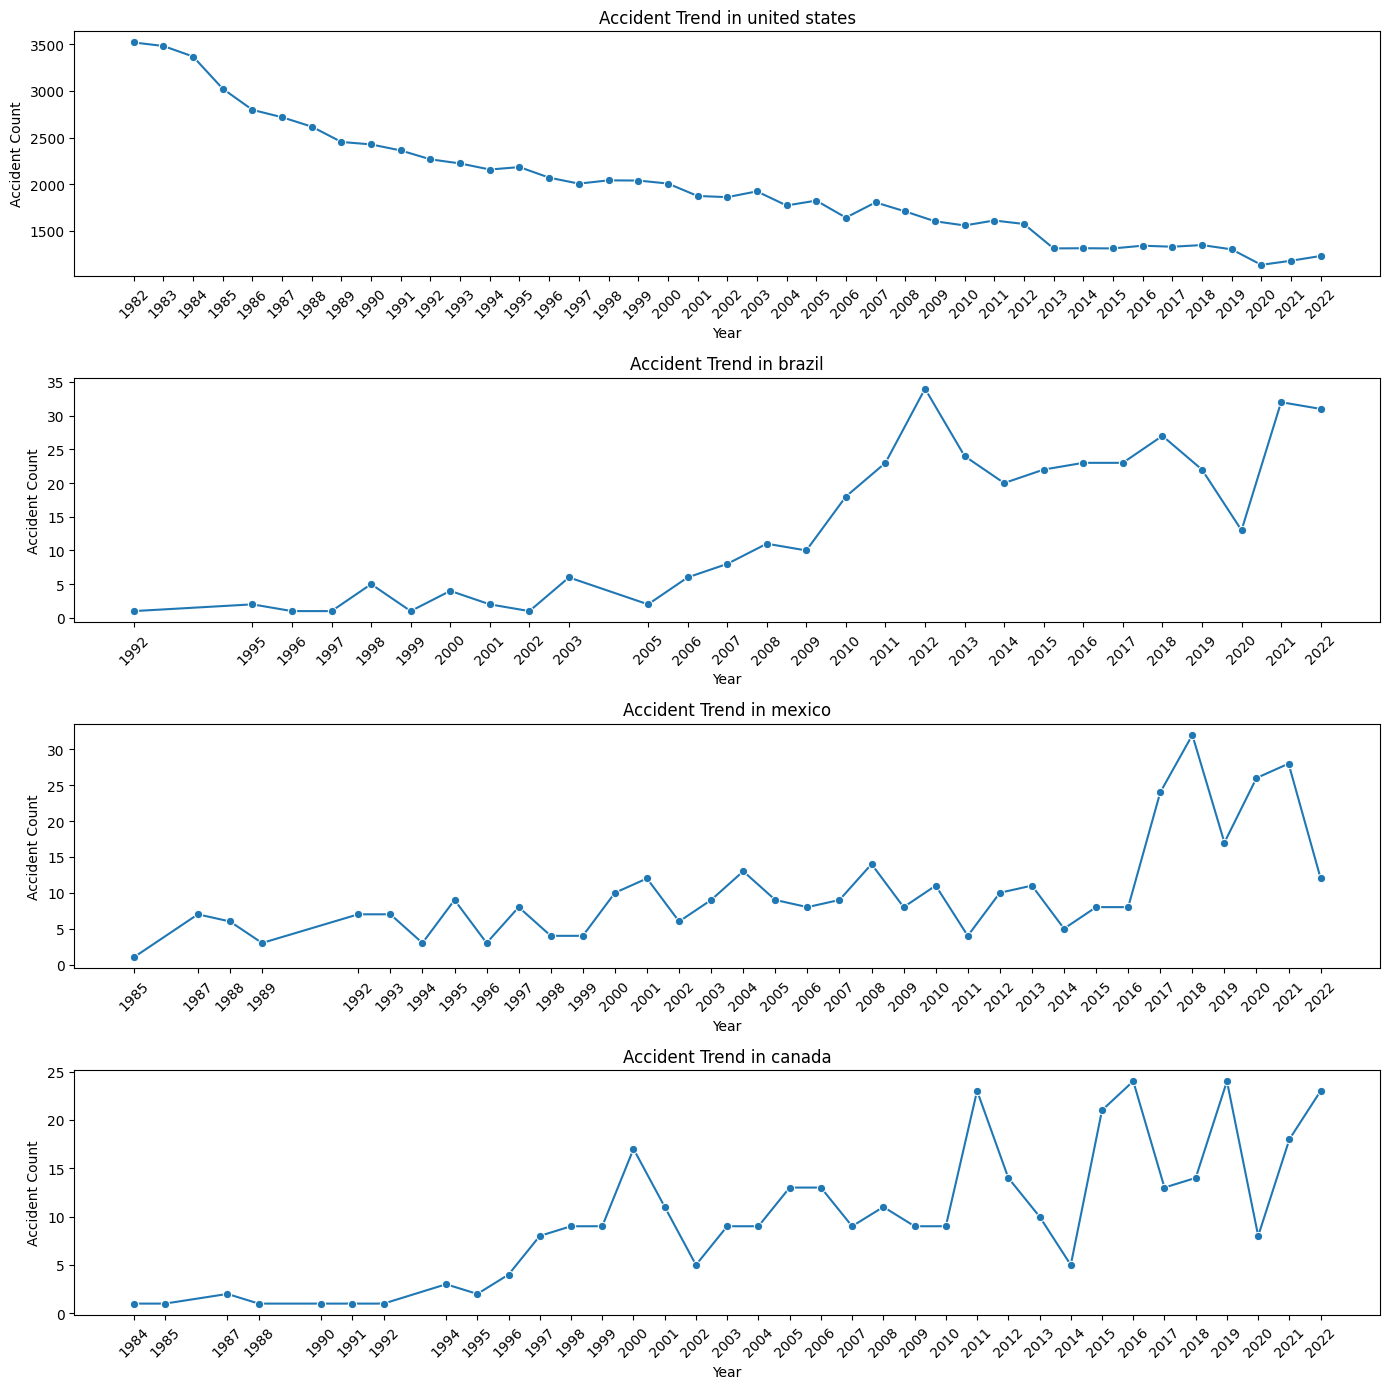

In [24]:
# Convert "Event_Year" to integer format
df2["Event_Year"] = df2["Event_Year"].astype(int)

# Get the top 4 countries  with the most accidents (excluding "UNKNOWN")
most_affected_countries = df2["Country"].value_counts().head(5).index.tolist()
most_affected_countries = [country for country in most_affected_countries if country != "UNKNOWN"]

# Filter DataFrame to start from 1982 or the earliest registered year for each country.
filtered_data = df2[df2["Event_Year"] >= 1982]

# Aggregate accident frequencies per year for each country
accident_trends = filtered_data.groupby(["Event_Year", "Country"]).size().reset_index(name="Accident_Count")


fig, axes = plt.subplots(4, 1, figsize=(14, 14))

# We will Loop through the first 4 most affected countries and plot accident trends
for i, country in enumerate(most_affected_countries[:4]):
    country_accidents = accident_trends[accident_trends["Country"] == country]

    sns.lineplot(data=country_accidents, x="Event_Year", y="Accident_Count", ax=axes[i], marker='o')
    axes[i].set_title(f"Accident Trend in {country}")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Accident Count")

    # Ensure consistent x-axis formatting across all graphs
    axes[i].set_xticks(sorted(country_accidents["Event_Year"].unique()))
    axes[i].tick_params(axis='x', rotation=45)

# Improve spacing for clear visualization
plt.tight_layout()









### Analysis:
The head of the new aviation division may need to reconsider or conduct further research before initiating airplane operations in countries such as Canada and Mexico due to the increase in aviation accident frequency observed between 2020 and 2022.

However, since the dataset is not up to date,it's not safe to assume that it is still the case for years after 2022.

Additional analysis should be done, as significant changes in aviation trends may occur in the years after 2022.

###For which flight purpose have accidents been most frequent?

In [25]:
# take a look on the different purpose of flight
df2['Purpose_of_flight'].value_counts()

,count
Purpose_of_flight,
personal,49076
unknown,12731
instructional,10442
aerial application,4686
business,3971
positioning,1632
other work use,1250
ferry,806
aerial observation,787


Text(0, 0.5, 'Number of Accidents')

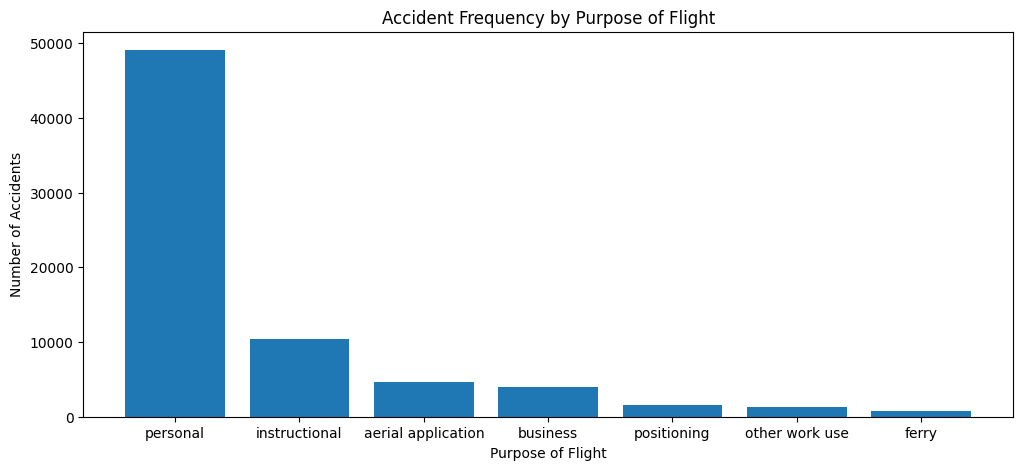

In [26]:
# Remove "Unknown" rows (temporarily) from the column :
purpose_of_flight = df2[~df2["Purpose_of_flight"].isin(["unknown"])]["Purpose_of_flight"].value_counts().head(7)


fig, ax = plt.subplots(figsize=(12, 5))  # Fixed typo

# Plot bar chart
ax.bar(purpose_of_flight.index, purpose_of_flight.values)
ax.set_title("Accident Frequency by Purpose of Flight")
ax.set_xlabel("Purpose of Flight")
ax.set_ylabel("Number of Accidents")




#### Analysis:
N.B: This graph does not show which purpose of flight is most likely to cause an accident. It only presents accident frequency by purpose, not accident rates.

For example, personal flights may have the highest accident count simply because they account for more aircraft operations overall.


The frequency of Aircraft accident for personal purpose of flight may prompt the head of the new aviation division to take specific measures of safety regarding the personal or other very recurrent flight purposes, but it should not be assumed that higher frequency directly correlates with a higher accident rate.

### How resistant are certain aircraft makes to accidents?

In [27]:
# Let's take a look at the Aircraft_damage unique values first.
df2['Aircraft_damage'].value_counts(5)

,proportion
Aircraft_damage,
substantial,0.723596
destroyed,0.209230
unknown,0.036634
minor,0.030540


#### The 5 Aircraft Makes with the most aviation accidents will be represented in the plot below.
It would get very messy to include all of the aircraft makes in the following plot using Jupyter or a similar notebook. That's why we will conduct the analysis on the five most recurrent aircraft makes, as these are likely very popular. Popular aircraft certainly have more data available for further analysis.

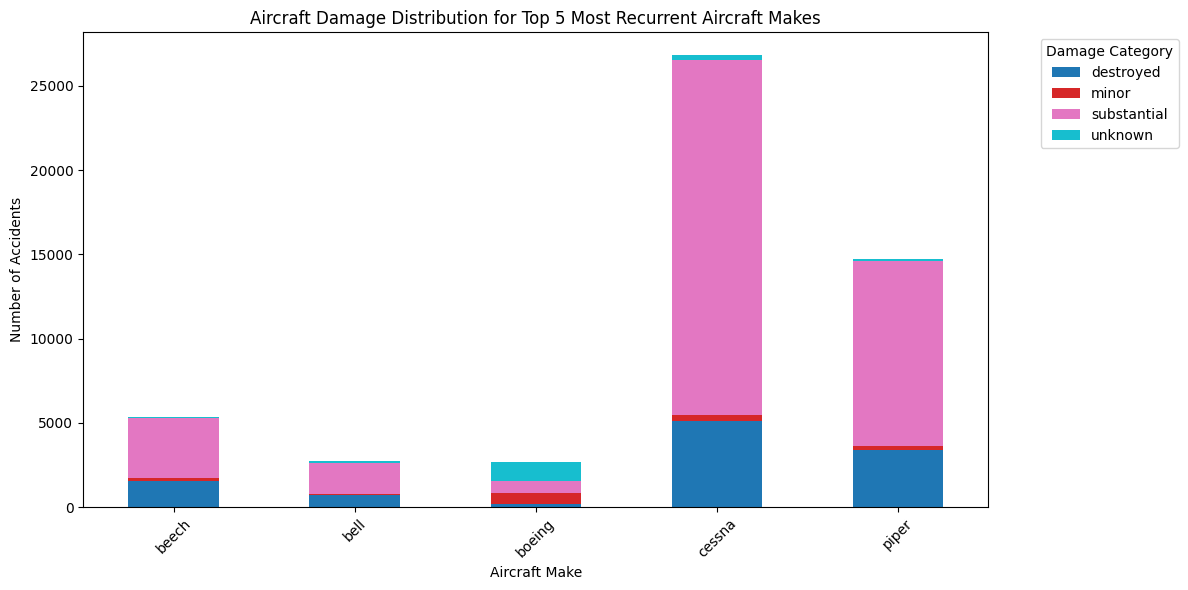

In [28]:
# Get the 5 most recurrent Aircraft Makes
top_5_makes = df2['Make'].value_counts().head(5).index

# Filter dataset to include only the top 5 aircraft makes
filtered_df = df2[df2['Make'].isin(top_5_makes)]

# Aggregate aircraft damage counts per make
damage_counts = filtered_df.groupby('Make')['Aircraft_damage'].value_counts().unstack().fillna(0)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
damage_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

# Set labels and title
ax.set_title("Aircraft Damage Distribution for Top 5 Most Recurrent Aircraft Makes")
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Number of Accidents")
ax.legend(title="Damage Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()




#### Analysis
We can tell from the plot above that Cessna has experienced significantly more accidents than other aircraft makes shown. Additionally, its aircraft have been found in a destroyed state more frequently than others.

The cause could be that Cessna has operated more flights, or it might be directly related to the aircraft's structural resilience or operational management.

More advanced analysis should be conducted by incorporating latitude and longitude data, for more informed decision-making.

###How well are passengers protected in the event of an aircraft crash for certain Aircraft models?

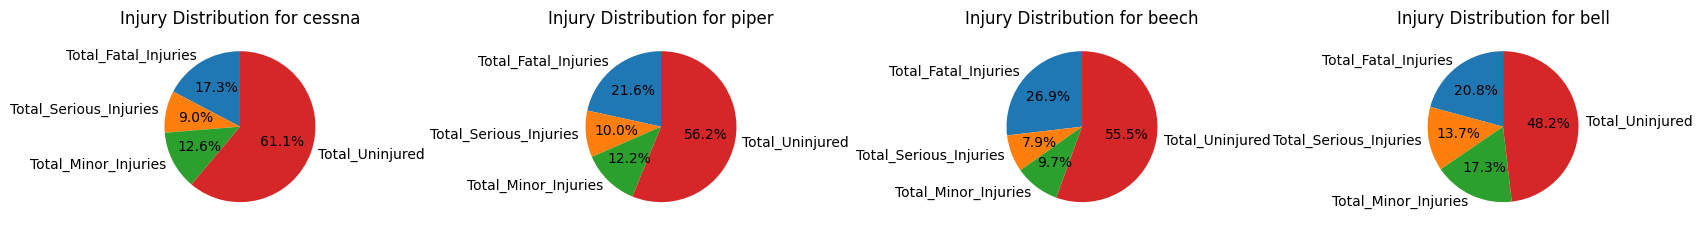

In [29]:
# for this analysis, we will provide an answer for the 4 most recurrent aircraft makes.
# 4 pie charts will be provided.

# Get the 4 most recurrent aircraft makes
# Get the 4 most recurrent aircraft makes
top_4_makes = df2['Make'].value_counts().head(4)


# Create figure and axes for  pie charts
fig, axes = plt.subplots(1, 4, figsize=(17, 10))

# Loop through each aircraft make and generate a pie chart
for i, make in enumerate(top_4_makes.index):
    # Filter data for the specific aircraft make
    make_data = df2[df2['Make'] == make][['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']]

    # Sum injury types
    injury_counts = make_data.sum()

    # Generate pie chart
    axes[i].pie(injury_counts, labels=list(injury_counts.index), autopct="%1.1f%%", startangle=90)
    axes[i].set_title(f"Injury Distribution for {make}")

# Improve layout for clarity
plt.tight_layout()
plt.show()





#### Analysis:
Even though the previous plot indicated that Cessna has sustained the most accidents, these pie charts reveal that among the four most recurrent aircraft makes, Cessna tends to have a higher proportion of uninjured occupants and a lower number of total fatal injuries. This means that the high frequency of accidents that Cessna has sustained could be the result of very frequents operations, and that it protects passengers pretty well compared to many others in cases of accidents.


## Additional notes

The aircraft models are not included in this analysis due to their large variety. When dealing with categorical data at this scale, it becomes challenging to manage effectively using Python alone. Platforms like Power BI or Tableau would be better suited for this type of analysis, as they offer more efficient handling of extensive categorical datasets and possibility to craft interactive plots.

The Amount of models provided by this dataset is shown bellow.

In [30]:
# Amount of Aircraft models:
df2['Model'].value_counts()
# it has 11 563 rows.
# the amount of Models is approximately that number.

,count
Model,
152,2313
172,1743
172n,1144
pa-28-140,925
150,820
...,...
sportsman gs2,1
roaring eagle,1
zenith ch-750,1


##Summary

> For this analysis, we used a dataset from Kaggle: **"Aviation Accident Database & Synopses, up to 2023."**  
After cleaning, we aimed to address key questions that the head of the aviation division is likely to have.  
> For each analysis, we found the following information:  
> - The aircraft that has sustained the fewest accidents is not necessarily the safest.  
> - Accident frequency increased from 2020 to 2022 in both Brazil and Canada.  
> - there have been far more accidents for personal flight purposes, but we shouldn't assume that this correlates directly with accident rates. Instead, should implement specific safety measures to ensure smooth operations for
these flights  
> - In the last two analyses, Cessna had the highest number of accidents and aircraft damage. However, passengers flying on Cessna aircraft appear to be better protected in the event of an accident compared to the other aircraft makes graphted along with our Analysis. The percentage of total fatal injuries is lower than that of the other top three recurrent aircraft makes, while the percentage of total uninjured occupants is higher.  




##Contact Information

- First Name: Haender Michael

- Last Name: Jean Louis

- Email: michaelhaenderjeanlouis@gmail.com

- Phone Number: +509 41 75 0264

- LinkedIn: Michael Haender Jean Louis

## Correction:
More down to earth recommendations.

Use pandas (they evaluate you on your ability to use pandas)

Insert the link to my linkedin profile

write a prompt to enduce stakeholders into asking more questions.

proportion of fatalities by phase of flights.